In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import os
from functions import mapa_calor, acuracia

In [43]:
dados = pd.read_csv("dados/dados_perfeito.csv")
del dados["Unnamed: 0"]
dados

,comprimento de onda,cor
0,460.00,azul
1,460.65,azul
2,461.31,azul
3,461.96,azul
4,462.61,azul
...,...,...
195,587.39,verde
196,588.04,verde
197,588.69,verde
198,589.35,verde


In [44]:
# Cria a camada de normalização
normalization_layer = keras.layers.Normalization(axis=-1)

# Adapta a camada aos dados (necessário para calcular a média e o desvio padrão)
normalization_layer.adapt(dados['comprimento de onda'].values.reshape(-1, 1))

In [45]:
encoder = OneHotEncoder()
cor_encoded = encoder.fit_transform(dados['cor'].values.reshape(-1,1))
cor_encoded.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [46]:
x = dados['comprimento de onda'].array.reshape(-1,1)

In [47]:
cor_encoded = tf.constant(value=cor_encoded.toarray(),dtype='int16')
cor_encoded

<tf.Tensor: shape=(200, 2), dtype=int16, numpy=
array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       

In [48]:
wavelength = tf.constant(dados['comprimento de onda'].array.reshape(-1,1),dtype='float64')
wavelength

<tf.Tensor: shape=(200, 1), dtype=float64, numpy=
array([[460.  ],
       [460.65],
       [461.31],
       [461.96],
       [462.61],
       [463.27],
       [463.92],
       [464.57],
       [465.23],
       [465.88],
       [466.53],
       [467.19],
       [467.84],
       [468.49],
       [469.15],
       [469.8 ],
       [470.45],
       [471.11],
       [471.76],
       [472.41],
       [473.07],
       [473.72],
       [474.37],
       [475.03],
       [475.68],
       [476.33],
       [476.98],
       [477.64],
       [478.29],
       [478.94],
       [479.6 ],
       [480.25],
       [480.9 ],
       [481.56],
       [482.21],
       [482.86],
       [483.52],
       [484.17],
       [484.82],
       [485.48],
       [486.13],
       [486.78],
       [487.44],
       [488.09],
       [488.74],
       [489.4 ],
       [490.05],
       [490.7 ],
       [491.36],
       [492.01],
       [492.66],
       [493.32],
       [493.97],
       [494.62],
       [495.28],
       [495.93]

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=.2,random_state=42)

for train_index, test_index in split.split(dados,dados['cor']):
    strat_train_set = dados.loc[train_index]
    strat_test_set = dados.loc[test_index]

Divisão usando train_test_split

In [50]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(dados['comprimento de onda'].values.reshape(-1,1),
                                                  dados['cor'].values.reshape(-1,1),
                                                  test_size=.2,
                                                  random_state=42)

In [51]:
len(y_train[y_train == 'azul'])/len(y_train)

0.625

In [52]:
len(y_test[y_test == 'azul'])/len(y_test)

0.575

In [53]:
x_train, y_train = strat_train_set['comprimento de onda'].values.reshape(-1,1), strat_train_set['cor'].values.reshape(-1,1)
x_test,y_test = strat_test_set['comprimento de onda'].values.reshape(-1,1), strat_test_set['cor'].values.reshape(-1,1)

In [54]:
len(dados[dados['cor']=='azul'])/len(dados['cor'].values)

0.615

In [55]:
len(y_train[y_train == 'azul'])/len(y_train)

0.6125

In [56]:
len(y_test[y_test == 'azul'])/len(y_test)

0.625

In [57]:
y_train.reshape(-1,1)

array([['azul'],
       ['verde'],
       ['verde'],
       ['azul'],
       ['azul'],
       ['verde'],
       ['azul'],
       ['azul'],
       ['verde'],
       ['azul'],
       ['azul'],
       ['verde'],
       ['azul'],
       ['azul'],
       ['azul'],
       ['verde'],
       ['verde'],
       ['verde'],
       ['azul'],
       ['verde'],
       ['azul'],
       ['azul'],
       ['verde'],
       ['azul'],
       ['azul'],
       ['verde'],
       ['verde'],
       ['azul'],
       ['verde'],
       ['verde'],
       ['azul'],
       ['verde'],
       ['azul'],
       ['azul'],
       ['azul'],
       ['azul'],
       ['azul'],
       ['azul'],
       ['azul'],
       ['azul'],
       ['azul'],
       ['azul'],
       ['azul'],
       ['verde'],
       ['azul'],
       ['azul'],
       ['verde'],
       ['azul'],
       ['verde'],
       ['verde'],
       ['azul'],
       ['azul'],
       ['azul'],
       ['verde'],
       ['azul'],
       ['azul'],
       ['verde'],
       ['a

In [58]:
encoder = OneHotEncoder()
y_train = encoder.fit_transform(y_train).toarray()
y_test = encoder.fit_transform(y_test).toarray()

In [59]:
modelos_lineares = {}
num_modelos = 5
for i in range(num_modelos+1):
    modelos_lineares[f'Perceptron{i}.keras'] = keras.models.Sequential([
    normalization_layer,
    keras.layers.Dense(2,activation='softmax')
    ])
    modelos_lineares[f'Perceptron{i}.keras'].compile(optimizer=keras.optimizers.SGD(learning_rate=1/10**i),loss='categorical_crossentropy',metrics=['accuracy'])

In [60]:
for name, model in modelos_lineares.items():
    if name not in os.listdir('./modelos_perceptron'):
        model.fit(x_train,y_train,epochs=100)
        model.save('./modelos_perceptron/' + name)
    else:
        model = keras.models.load_model('./modelos_perceptron/'+ name)

Por conta de dar um problema de o confusion_matrix entender que está sendo continuo. O que será feito é um arredondamento do np max para que então, ele caia entre 1 ou 0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


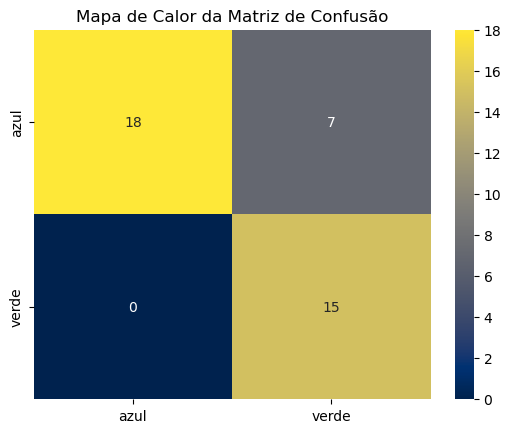

In [61]:
mapa_calor(modelos_lineares['Perceptron0.keras'].predict(x_test),y_test,'Mapa de Calor da Matriz de Confusão',encoder)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


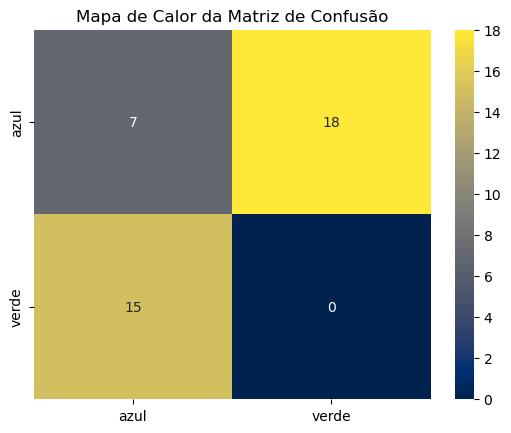

In [62]:
mapa_calor(modelos_lineares['Perceptron1.keras'].predict(x_test),y_test,'Mapa de Calor da Matriz de Confusão',encoder)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


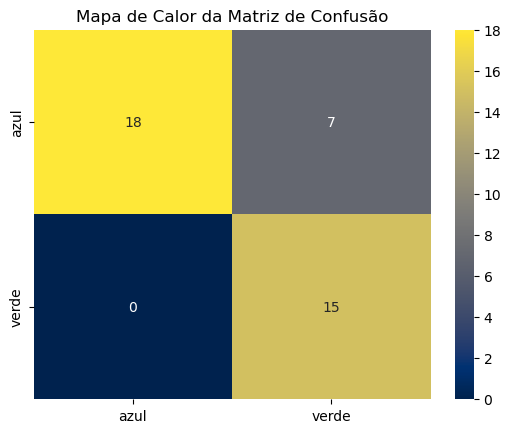

In [63]:
mapa_calor(modelos_lineares['Perceptron2.keras'].predict(x_test),y_test,'Mapa de Calor da Matriz de Confusão',encoder)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


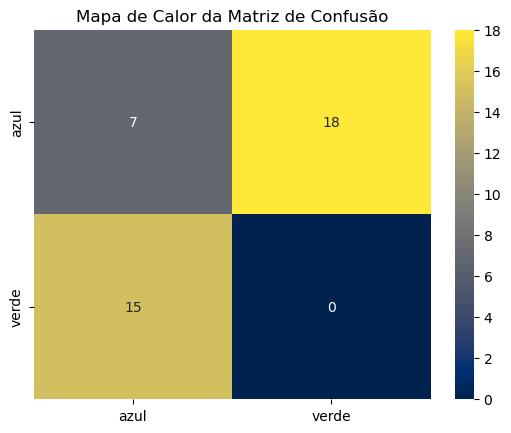

In [64]:
mapa_calor(modelos_lineares['Perceptron3.keras'].predict(x_test),y_test,'Mapa de Calor da Matriz de Confusão',encoder)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


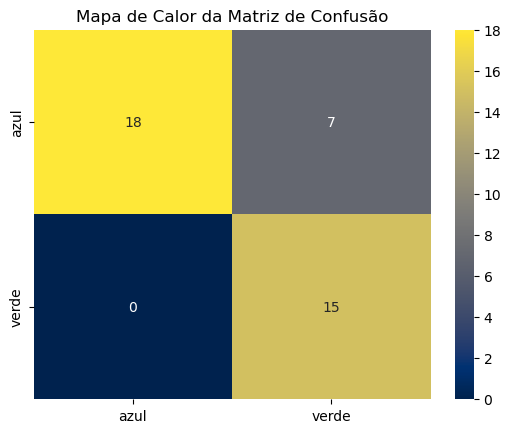

In [65]:
mapa_calor(modelos_lineares['Perceptron4.keras'].predict(x_test),y_test,'Mapa de Calor da Matriz de Confusão',encoder)

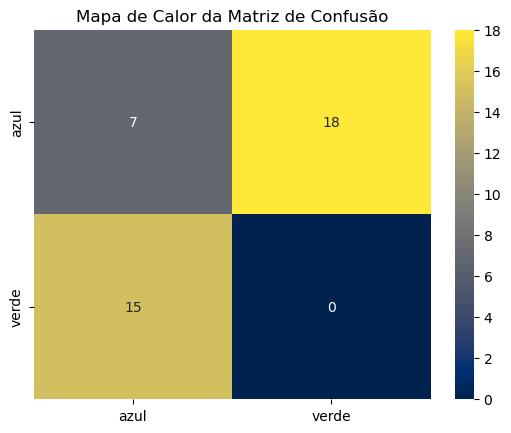

In [66]:
mapa_calor(modelos_lineares['Perceptron5.keras'](x_test),y_test,'Mapa de Calor da Matriz de Confusão',encoder)

In [67]:
acuracia(modelos_lineares['Perceptron5.keras'].predict(x_test),y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


0.175

In [68]:
modelos_lineares['Perceptron0.keras'].predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.9016335 , 0.09836644],
       [0.48597378, 0.51402617],
       [0.1830831 , 0.81691694],
       [0.575338  , 0.4246619 ],
       [0.26439875, 0.73560125],
       [0.74427974, 0.25572023],
       [0.21912467, 0.7808753 ],
       [0.6395907 , 0.36040938],
       [0.10666165, 0.8933384 ],
       [0.22297773, 0.77702224],
       [0.7085327 , 0.29146722],
       [0.33996546, 0.6600345 ],
       [0.5698612 , 0.43013892],
       [0.13005382, 0.86994624],
       [0.20779696, 0.79220307],
       [0.46348426, 0.5365157 ],
       [0.65499496, 0.34500507],
       [0.44675145, 0.5532486 ],
       [0.24308984, 0.75691015],
       [0.43571714, 0.5642829 ],
       [0.8566696 , 0.14333047],
       [0.19339247, 0.80660754],
       [0.48029977, 0.5197002 ],
       [0.8538998 , 0.14610025],
       [0.5971306 , 0.4028693 ],
       [0.10451565, 0.8954843 ],
       [0.5028405 , 0.49715948],
       [0.84818274, 0.1518172 ],
       [0.419204  , 0.580796  ],
       [0.8995998 , 0.10040025],
       [0.

In [69]:
binario = []
for i in range(len(dados['cor'].values)):
    if dados['cor'].values[i] == 'azul':
        binario.append(1)
    else:
        binario.append(0)
dados['binario'] = binario

In [70]:
azul = dados[dados["cor"] == "azul"]
verde = dados[dados["cor"] == "verde"]
len(azul)

123

In [71]:
espaçamento = .05
plt.scatter(azul['comprimento de onda'],azul['binario'],s=2,color='blue')
plt.scatter(verde['comprimento de onda'],verde['binario'],s=2,color='green')
plt.plot([540,540],[0-(+espaçamento+.01),1+espaçamento+.01],color='red')
plt.ylim((0 - espaçamento,1 + espaçamento))
plt.xlim((np.min(dados['comprimento de onda'].array) - espaçamento,np.max(dados["comprimento de onda"].array) + espaçamento))
plt.xlabel("Comprimento de onda (nm)")
plt.ylabel('probabilidade de ser azul')

plt.savefig("imagens/linearmente separavel.png")
plt.close()

In [72]:
modelos_lineares['Perceptron0.keras']

<Sequential name=sequential_6, built=True>

In [73]:
binario = tf.constant(dados['binario'].values.reshape(-1,1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


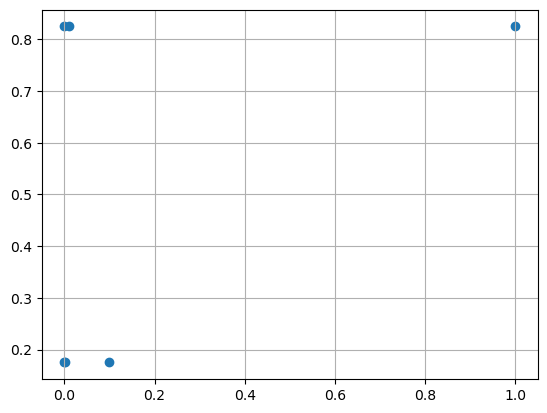

In [74]:
x = [1/10**i for i in range(len(modelos_lineares))]
y = [acuracia(modelo.predict(x_test),y_test) for modelo in modelos_lineares.values()]

plt.scatter(x,y)
plt.grid()

In [75]:
acuracia(modelos_lineares['Perceptron5.keras'].predict(x_test),y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


0.175